# 🔹UFC Model Training

<p align="center">
  <img src="/../../img/ufc_logo.png" width="300">
</p>

## 1. Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from utils.metrics import *
from models.model_factory import *
from utils.io_model import *
from utils.helpers import *

# Define the path to the CSV file
train_path = os.path.join(project_root, 'data', 'processed', 'ufc_train.csv')
test_path = os.path.join(project_root, 'data', 'processed', 'ufc_test.csv')

## 2. Load Data

In [2]:
# Load the CSV into a DataFrame
try:
    ufc_train = pd.read_csv(train_path)
    print_header(f"Data Training successfully loaded: {ufc_train.shape[0]} rows, {ufc_train.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

╔═════════════════════════════════════════════════════════════╗
║  Data Training successfully loaded: 5232 rows, 47 columns.  ║
╚═════════════════════════════════════════════════════════════╝


In [3]:
# Load the CSV into a DataFrame
try:
    ufc_test = pd.read_csv(test_path)
    print_header(f"Data Testing successfully loaded: {ufc_test.shape[0]} rows, {ufc_test.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading testing data: {e}", color='bright_red')

╔════════════════════════════════════════════════════════════╗
║  Data Testing successfully loaded: 1309 rows, 47 columns.  ║
╚════════════════════════════════════════════════════════════╝


## 3. 🔧 Hyperparameters Tuning 🔧

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

hyperparameter_tuning = True

if hyperparameter_tuning:
    print_header('Hyperparameters Tuning is Activated', color = 'bright_blue')
    model_params = {
    "Support Vector Machine": (
        SVC(probability=True),
        {'C': [0.1, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['auto']}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10]}
    ),
    "Logistic Regression": (
        LogisticRegression(),
        {'C': [0.01, 0.1, 1], 'solver': ['liblinear', 'lbfgs']}
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    ),
    "AdaBoost": (
        AdaBoostClassifier(),
        {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 1.0, 10.0]}
    ),
    "Naive Bayes": (
        GaussianNB(),
        {'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5]}
    ),
    "Extra Trees": (
        ExtraTreesClassifier(),
        {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
    ),
    "Quadratic Discriminant Analysis": (
        QuadraticDiscriminantAnalysis(),
        {'reg_param': [0.01, 0.1, 1, 10]}
    )
}
else:
    print_header('Hyperparameters Tuning Off', color = 'bright_red')
    model_params = None # Default Settings

╔═══════════════════════════════════════╗
║  Hyperparameters Tuning is Activated  ║
╚═══════════════════════════════════════╝


## 4. 🔹 UFC Machine Learning Training

### 4.1 KNN Model Training

#### 🚀 KNN Training 

In [5]:
model_name = 'K-Nearest Neighbors'
knn_model = model_factory(model_name, ufc_train, model_params)

╔═══════════════════════════════════════════════════╗
║  [K-Nearest Neighbors] UFC GridSearchCV Training  ║
╚═══════════════════════════════════════════════════╝


INFO:root:[K-Nearest Neighbors] 🤖 Training...


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.546 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.529 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.563 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.524 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.543 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.545 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.528 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.525 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.542 tota

INFO:root:[K-Nearest Neighbors] 🔍 Best Score: 0.5650
[K-Nearest Neighbors] 🔍 Best Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


#### 🔍 KNN Metrics

╔══════════════════════════════════════════════════╗
║  Starting Evaluation for: [K-Nearest Neighbors]  ║
╚══════════════════════════════════════════════════╝
╔═══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}  ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.5462
Precision: 0.4522
Recall: 0.3782
F1 score: 0.4119

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


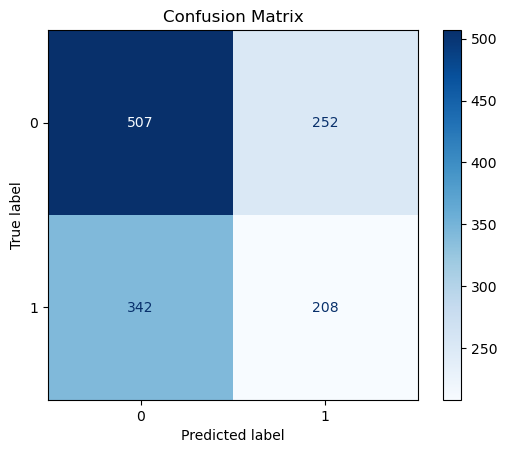

In [6]:
knn_metrics = evaluate_model(knn_model, ufc_test)

### 4.2 Support Vector Machine Model 

#### 🚀 Support Vector Machine Training 

In [7]:
model_name = 'Support Vector Machine'
svm_model = model_factory(model_name, ufc_train, model_params)

╔══════════════════════════════════════════════════════╗
║  [Support Vector Machine] UFC GridSearchCV Training  ║
╚══════════════════════════════════════════════════════╝


INFO:root:[Support Vector Machine] 🤖 Training...


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.607 total time=   5.6s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.604 total time=   5.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.595 total time=   5.3s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.594 total time=   5.1s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.587 total time=   5.4s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   5.8s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   5.8s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   6.1s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   6.1s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   5.8s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.582 total time=   5.0s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=poly;,

INFO:root:[Support Vector Machine] 🔍 Best Score: 0.6026
[Support Vector Machine] 🔍 Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


#### 🔍 Support Vector Machine Metrics

╔═════════════════════════════════════════════════════╗
║  Starting Evaluation for: [Support Vector Machine]  ║
╚═════════════════════════════════════════════════════╝
╔═════════════════════════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}  ║
╚═════════════════════════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.6104
Precision: 0.5962
Recall: 0.2255
F1 score: 0.3272

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


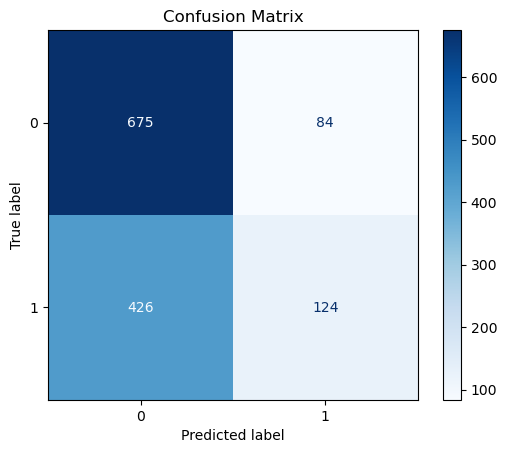

In [8]:
svm_metrics = evaluate_model(svm_model, ufc_test)

### 4.3 Logistic Regression Model

#### 🚀 Logistic Regression Training

In [9]:
model_name = 'Logistic Regression'
lr_model = model_factory(model_name, ufc_train, model_params)

╔═══════════════════════════════════════════════════╗
║  [Logistic Regression] UFC GridSearchCV Training  ║
╚═══════════════════════════════════════════════════╝


INFO:root:[Logistic Regression] 🤖 Training...


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.616 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.594 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.614 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.589 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.602 total time=   0.0s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.609 total time=   0.0s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.597 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.611 total time=   0.0s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.594 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.604 total time=   0.0s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.618 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;,

INFO:root:[Logistic Regression] 🔍 Best Score: 0.6089
[Logistic Regression] 🔍 Best Params: {'C': 1, 'solver': 'liblinear'}


#### 🔍 Logistic Regression Metrics

╔══════════════════════════════════════════════════╗
║  Starting Evaluation for: [Logistic Regression]  ║
╚══════════════════════════════════════════════════╝
╔══════════════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'C': 1, 'solver': 'liblinear'}  ║
╚══════════════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.6280
Precision: 0.6113
Recall: 0.3145
F1 score: 0.4154

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


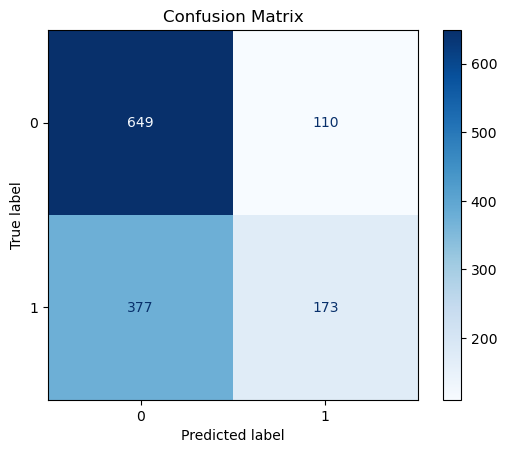

In [10]:
lr_metrics = evaluate_model(lr_model, ufc_test)

### 4.4 Random Forest Model

#### 🚀 Random Forest Training

In [11]:
model_name = 'Random Forest'
rf_model = model_factory(model_name, ufc_train)

╔═════════════════════════════════════════════╗
║  [Random Forest] UFC GridSearchCV Training  ║
╚═════════════════════════════════════════════╝


INFO:root:[Random Forest] 🤖 Training...


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.588 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.585 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.594 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=10;, score=0.589 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=10;, score=0.579 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.590 total time=   0.2s
[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.591 total time=   0.2s
[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.590 total time=   0.2s
[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.581 total time=   0.2s
[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.596 total time=   0.2s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.594 total time=   0.3s
[CV 2/5] END .....max_depth=3, n_estimators=100;,

INFO:root:[Random Forest] 🔍 Best Score: 0.6034
[Random Forest] 🔍 Best Params: {'max_depth': 10, 'n_estimators': 100}


#### 🔍 Random Forest Metrics

╔════════════════════════════════════════════╗
║  Starting Evaluation for: [Random Forest]  ║
╚════════════════════════════════════════════╝
╔═════════════════════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'max_depth': 10, 'n_estimators': 100}  ║
╚═════════════════════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.6089
Precision: 0.5896
Recall: 0.2273
F1 score: 0.3281

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


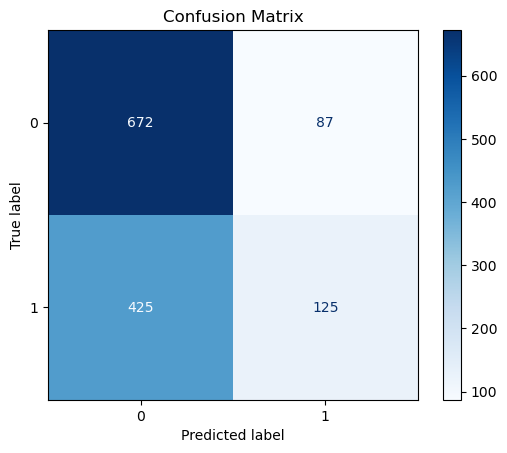

In [12]:
rf_metrics = evaluate_model(rf_model, ufc_test)

### 4.5 AdaBoost Model

#### 🚀 AdaBoost Training

In [13]:
model_name = 'AdaBoost'
ab_model = model_factory(model_name, ufc_train)

╔════════════════════════════════════════╗
║  [AdaBoost] UFC GridSearchCV Training  ║
╚════════════════════════════════════════╝


INFO:root:[AdaBoost] 🤖 Training...


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 2/5] END learning_rate=0.01, n_estimators=10;, score=0.581 total time=   0.1s
[CV 3/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 4/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 5/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.581 total time=   0.5s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.580 total time=   0.9s
[CV 2/5] END learning_rate=0.01, n_es

INFO:root:[AdaBoost] 🔍 Best Score: 0.5988
[AdaBoost] 🔍 Best Params: {'learning_rate': 1.0, 'n_estimators': 100}


#### 🔍 AdaBoost Metrics

╔═══════════════════════════════════════╗
║  Starting Evaluation for: [AdaBoost]  ║
╚═══════════════════════════════════════╝
╔══════════════════════════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'learning_rate': 1.0, 'n_estimators': 100}  ║
╚══════════════════════════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.6073
Precision: 0.5559
Recall: 0.3255
F1 score: 0.4106

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


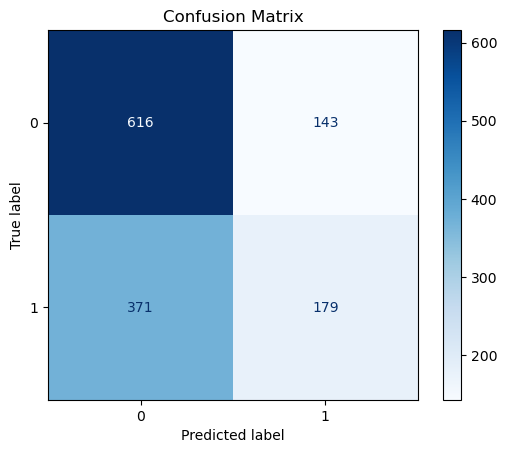

In [14]:
ab_metrics = evaluate_model(ab_model, ufc_test)

### 4.6 Naive Bayes Model

#### 🚀 Naive Bayes Training

In [15]:
model_name = 'Naive Bayes'
nb_model = model_factory(model_name, ufc_train)

╔═══════════════════════════════════════════╗
║  [Naive Bayes] UFC GridSearchCV Training  ║
╚═══════════════════════════════════════════╝


INFO:root:[Naive Bayes] 🤖 Training...


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.429 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.587 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.543 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.579 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.432 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.587 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-07;, score=0.543 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.579 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-06;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-06;,

INFO:root:[Naive Bayes] 🔍 Best Score: 0.5461
[Naive Bayes] 🔍 Best Params: {'var_smoothing': 1e-06}


#### 🔍 Naive Bayes Metrics

╔══════════════════════════════════════════╗
║  Starting Evaluation for: [Naive Bayes]  ║
╚══════════════════════════════════════════╝
╔═══════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'var_smoothing': 1e-06}  ║
╚═══════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.5982
Precision: 0.5276
Recall: 0.4164
F1 score: 0.4654

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


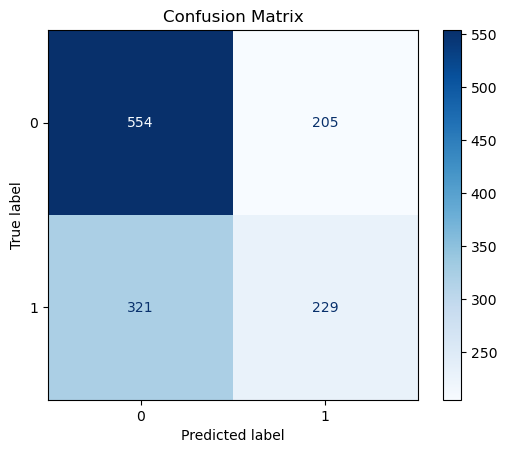

In [16]:
nb_metrics = evaluate_model(nb_model, ufc_test)

### 4.7 Gradient Boosting Model

#### 🚀 Gradient Boosting Training

In [17]:
model_name = "Gradient Boosting"
gb_model = model_factory(model_name, ufc_train)

╔═════════════════════════════════════════════════╗
║  [Gradient Boosting] UFC GridSearchCV Training  ║
╚═════════════════════════════════════════════════╝


INFO:root:[Gradient Boosting] 🤖 Training...


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.578 total time=   1.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.585 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.588 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.582 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.581 total time=   1.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.594 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.587 total time=   2.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.592 total time=   2.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.587 total time=   2.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.596 tot

INFO:root:[Gradient Boosting] 🔍 Best Score: 0.6057
[Gradient Boosting] 🔍 Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


#### 🔍 Gradient Boosting Metrics

╔════════════════════════════════════════════════╗
║  Starting Evaluation for: [Gradient Boosting]  ║
╚════════════════════════════════════════════════╝
╔═════════════════════════════════════════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}  ║
╚═════════════════════════════════════════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.6173
Precision: 0.6140
Recall: 0.2400
F1 score: 0.3451

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


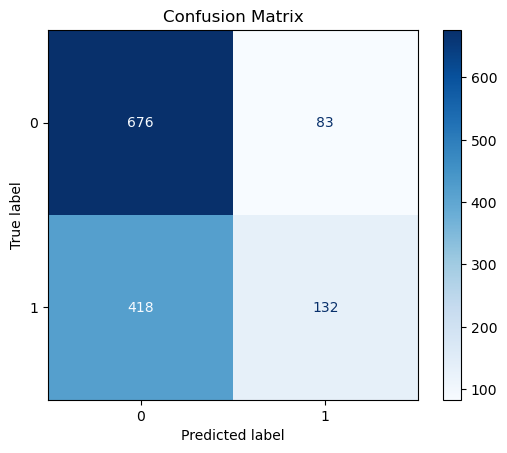

In [18]:
gb_metrics = evaluate_model(gb_model, ufc_test)

### 4.8 Extra Trees Model

#### 🚀 Extra Trees Training

In [19]:
model_name = "Extra Trees"
et_model = model_factory(model_name, ufc_train)

╔═══════════════════════════════════════════╗
║  [Extra Trees] UFC GridSearchCV Training  ║
╚═══════════════════════════════════════════╝


INFO:root:[Extra Trees] 🤖 Training...


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.595 total time=   0.4s
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.577 total time=   0.4s
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.595 total time=   0.4s
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.574 total time=   0.4s
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.577 total time=   0.4s
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.601 total time=   0.7s
[CV 2/5] END ..max_depth=None, n_estimators=100;, score=0.591 total time=   0.7s
[CV 3/5] END ..max_depth=None, n_estimators=100;, score=0.590 total time=   0.7s
[CV 4/5] END ..max_depth=None, n_estimators=100;, score=0.581 total time=   0.7s
[CV 5/5] END ..max_depth=None, n_estimators=100;, score=0.585 total time=   0.7s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.594 total time=   0.1s
[CV 2/5] END .....max_depth=10, n_estimators=50;,

INFO:root:[Extra Trees] 🔍 Best Score: 0.5906
[Extra Trees] 🔍 Best Params: {'max_depth': 10, 'n_estimators': 100}


#### 🔍 Extra Trees Metrics

╔══════════════════════════════════════════╗
║  Starting Evaluation for: [Extra Trees]  ║
╚══════════════════════════════════════════╝
╔═════════════════════════════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'max_depth': 10, 'n_estimators': 100}  ║
╚═════════════════════════════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.5951
Precision: 0.6351
Recall: 0.0855
F1 score: 0.1506

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


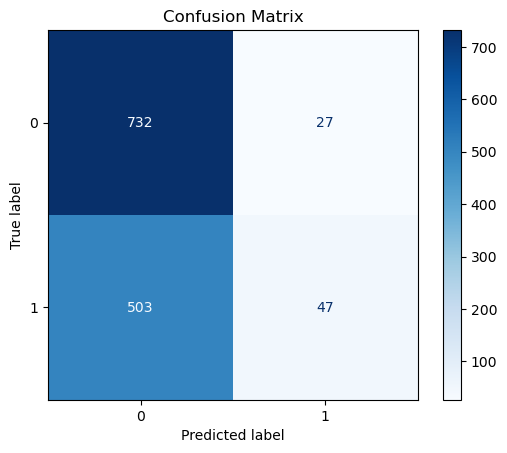

In [20]:
et_metrics = evaluate_model(et_model, ufc_test)

### 4.9 Quadratic Discriminant Analysis Model

#### 🚀 Quadratic Discriminant Analysis Training

In [36]:
model_name = "Quadratic Discriminant Analysis"
qda_model = model_factory(model_name, ufc_train, model_params)

╔═══════════════════════════════════════════════════════════════╗
║  [Quadratic Discriminant Analysis] UFC GridSearchCV Training  ║
╚═══════════════════════════════════════════════════════════════╝


INFO:root:[Quadratic Discriminant Analysis] 🤖 Training...


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....................reg_param=0.01;, score=0.613 total time=   0.0s
[CV 2/5] END ....................reg_param=0.01;, score=0.455 total time=   0.0s
[CV 3/5] END ....................reg_param=0.01;, score=0.578 total time=   0.0s
[CV 4/5] END ....................reg_param=0.01;, score=0.480 total time=   0.0s
[CV 5/5] END ....................reg_param=0.01;, score=0.514 total time=   0.0s
[CV 1/5] END .....................reg_param=0.1;, score=0.600 total time=   0.0s
[CV 2/5] END .....................reg_param=0.1;, score=0.472 total time=   0.0s
[CV 3/5] END .....................reg_param=0.1;, score=0.588 total time=   0.0s
[CV 4/5] END .....................reg_param=0.1;, score=0.534 total time=   0.0s
[CV 5/5] END .....................reg_param=0.1;, score=0.533 total time=   0.0s
[CV 1/5] END .......................reg_param=1;, score=0.596 total time=   0.0s
[CV 2/5] END .......................reg_param=1;,

INFO:root:[Quadratic Discriminant Analysis] 🔍 Best Score: 0.5856
[Quadratic Discriminant Analysis] 🔍 Best Params: {'reg_param': 1}


#### 🔍 Quadratic Discriminant Analysis Metrics

╔══════════════════════════════════════════════════════════════╗
║  Starting Evaluation for: [Quadratic Discriminant Analysis]  ║
╚══════════════════════════════════════════════════════════════╝
╔═══════════════════════════════════════════════════════════╗
║  Best Parameters Found with GridSearch: {'reg_param': 1}  ║
╚═══════════════════════════════════════════════════════════╝
🔍 Model Evaluation Metrics 🔍:
Accuracy: 0.5913
Precision: 0.5170
Recall: 0.4145
F1 score: 0.4601

╔════════════════════╗
║  Confusion Matrix  ║
╚════════════════════╝


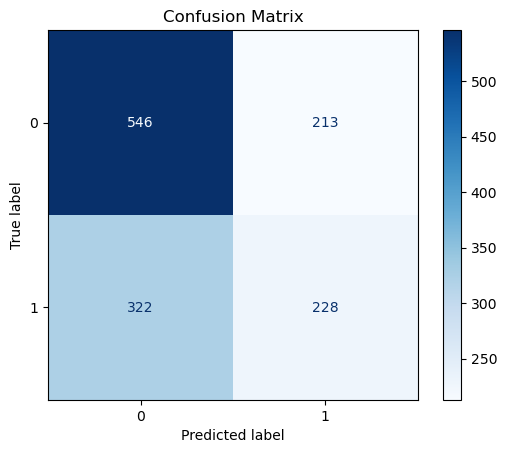

In [37]:
qda_metrics = evaluate_model(qda_model, ufc_test)

## 4. Save

In [23]:
save_model(knn_model, name='knn_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/knn_best.pkl


In [24]:
save_model(svm_model, name='svm_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/svm_best.pkl


In [25]:
save_model(lr_model, name='lr_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/lr_best.pkl


In [26]:
save_model(rf_model, name='rf_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/rf_best.pkl


In [27]:
save_model(ab_model, name='ab_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/ab_best.pkl


In [28]:
save_model(nb_model, name='nb_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/nb_best.pkl


In [29]:
save_model(et_model, name='et_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/et_best.pkl


In [30]:
save_model(gb_model, name='gb_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/gb_best.pkl


In [38]:
save_model(qda_model, name='qda_best')

✅ Model saved to: /home/mfourier/ufc-predictor/models/qda_best.pkl
